In [63]:
import pandas as pd
import numpy as np
import operator
from itertools import combinations
import matplotlib.pyplot as plt
from collections import Counter

import time

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.six import StringIO
IPythonConsole.ipython_useSVG=True

np.random.seed(314)

In [64]:
df = pd.read_csv("data/processed/smiles.csv", sep=';', encoding='unicode_escape')
df

,molregno,standard_value_get_mean,standard_units_get_levels,standard_type_get_levels,chembl_id_compound_get_levels,canonical_smiles_get_levels,act_0,act_1,act_2,act_3,act_4,act_5,act_6,act_7,act_8,act_9,act_10,act_11,act_12
0,2208,199.53,nM,IC50,CHEMBL38,CC1=C(/C=C/C(C)=C/C=C/C(C)=C/C(=O)O)C(C)(C)CCC1,199.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40459,31900.0,nM,IC50,CHEMBL28721,O=C(O)C(S)C(S)C(=O)O,31900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,92776,1770.0946666666666,nM,IC50,CHEMBL62136,O=S(=O)(c1ccccc1)N(CC(F)(F)F)c1ccc(C(O)(C(F)(F...,60.0,204.0,316.23,330.0,501.19,540.0,1700.0,1730.0,2010.0,3000.0,3500.0,4400.0,6500.0
3,155592,10000.0,nM,IC50,CHEMBL418971,CC(C)(c1ccc(O)cc1)c1ccc(O)cc1,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201200,2820.0,nM,IC50,CHEMBL169,C[C@@H]1[C@H]2C3=CC[C@@H]4[C@@]5(C)CC[C@H](O)C...,130.0,680.0,1060.0,9410.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,2459160,75.0,nM,IC50,CHEMBL4588729,O=C(O)c1ccc(-n2cc(C(=O)c3c(Cl)cccc3Cl)c3ccccc3...,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2211,2459686,2578.0,nM,IC50,CHEMBL4589255,Cc1c(C(=O)c2c(Cl)cccc2Cl)c2ccccc2n1-c1ccc(C(=O...,156.0,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2212,2462878,27.0,nM,IC50,CHEMBL4592447,Cc1cccc(Cl)c1C(=O)c1cn(-c2ccc(C(=O)O)cc2F)c2nc...,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2213,2463217,357.7,nM,IC50,CHEMBL4592786,N#Cc1cccc(NC(=O)Nc2ccc3c(c2)C(N2CC4CCC(C2)N4C(...,357.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df.columns


Index(['molregno', 'standard_value_get_mean', 'standard_units_get_levels',
       'standard_type_get_levels', 'chembl_id_compound_get_levels',
       'canonical_smiles_get_levels', 'act_0', 'act_1', 'act_2', 'act_3',
       'act_4', 'act_5', 'act_6', 'act_7', 'act_8', 'act_9', 'act_10',
       'act_11', 'act_12'],
      dtype='object')

In [66]:
df_probe = df.iloc[1100:1103]
df_probe

,molregno,standard_value_get_mean,standard_units_get_levels,standard_type_get_levels,chembl_id_compound_get_levels,canonical_smiles_get_levels,act_0,act_1,act_2,act_3,act_4,act_5,act_6,act_7,act_8,act_9,act_10,act_11,act_12
1100,2142241,202.0,nM,IC50,CHEMBL3932870,CC1(C(=O)O)CCN(C(=O)N2CC[C@](c3ccc(C(OCc4c(F)c...,202.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1101,2142430,171.0,nM,IC50,CHEMBL3933059,Cc1cc(S(=O)(=O)[C@@]2(c3ccc(C(F)(C(F)(F)F)C(F)...,171.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1102,2142445,5666.666666666667,nM,IC50,CHEMBL3933074,Cn1cncc1C(O)(c1ccc(C(F)(F)F)nc1)c1ccc2nc(C#N)c...,5000.0,6000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
mols = [Chem.MolFromSmiles(smi) for smi in df_probe['canonical_smiles_get_levels']]

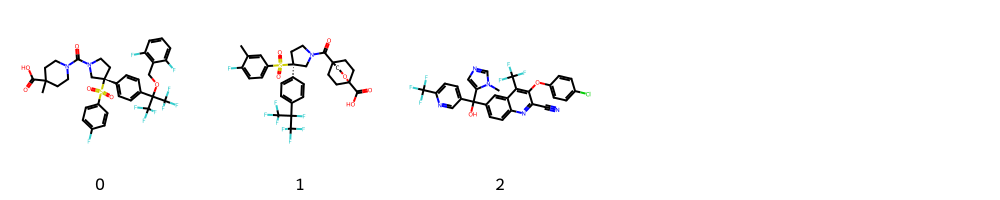

In [68]:
Draw.MolsToGridImage(mols, molsPerRow=5, legends=[str(i) for i in range(len(mols))])

In [69]:
from rdkit.Chem.Scaffolds import MurckoScaffold
scaffolds = [MurckoScaffold.GetScaffoldForMol(smi) for smi in mols]

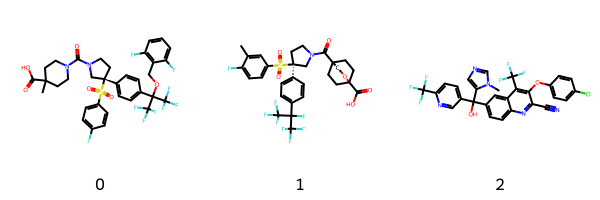

In [70]:
Draw.MolsToGridImage(mols, legends=[str(i) for i in range(len(mols))])

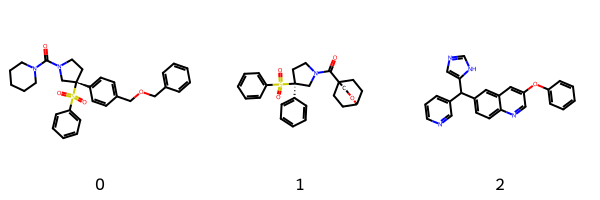

In [71]:
Draw.MolsToGridImage(scaffolds, legends=[str(i) for i in range(len(scaffolds))])